<a href="https://colab.research.google.com/github/obengfrancis/Python_project/blob/main/Phising_site_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction import FeatureHasher

In [2]:
df = pd.read_csv('phishing_site_urls.csv')



In [3]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

Data Exploration

In [4]:
df.shape

(549346, 2)

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(549346, 2)

In [7]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
X = df['URL']
y = df['Label']

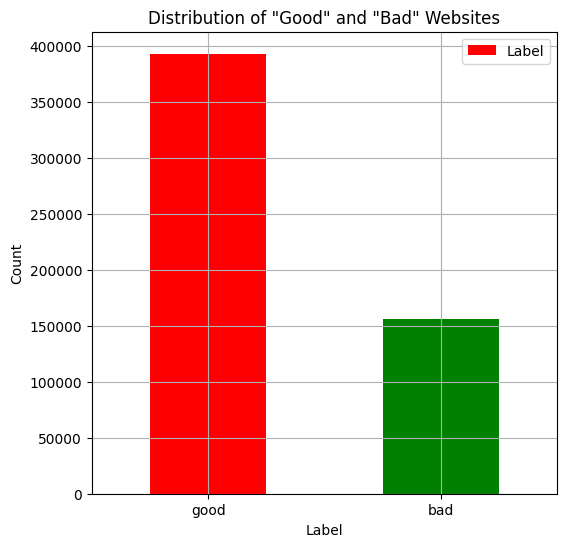

In [10]:
plt.figure(figsize=(6, 6))
df['Label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of "Good" and "Bad" Websites')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()
plt.grid('True')
plt.xticks(rotation=0)
plt.show()

Data preprocessing

In [11]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

Split the data into training and testing sets


In [12]:
print(df.columns)

Index(['URL', 'Label'], dtype='object')


In [13]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [14]:
df['Label'].value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

In [15]:
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_url(row):
    if row['Label'] == 'good':
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(row['URL'])
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return row['URL']

df['URL'] = df.apply(preprocess_url, axis=1)

grouped = df.groupby('Label')

print("Rows with 'good' label:")
print(grouped.get_group('good'))

print("\nRows with 'bad' label:")
print(grouped.get_group('bad'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Rows with 'good' label:
                                                      URL Label
18231   esxcc.com/js/index.htm ? us.battle.net/noghn/e...  good
18232   wwweira¯ & nvinip¿ncH¯wVö % ÆåyDaHðû/ÏyEùuË ...  good
18233   'www.institutocgr.coo/web/media/syqvem/dk-óij...  good
18234                Yìê koãÕ » Î§DéÎl½ñ¡ââqtò¸/à ; Í  good
18236   ruta89fm.com/images/AS @ Vies/1i75cf7b16vc < F...  good
...                                                   ...   ...
483590  youthleaguesusa.com/potomacsoccer/2011/Tournam...  good
483591                                     zip-codes.com/  good
483592                  owens.edu/news-releases/ ? p=2052  good
483593    1.safesecureweb.com/egale/index.asp ? item=1173  good
483594               yurika.otakuthon.com/reg/main.pl/en/  good

[392924 rows x 2 columns]

Rows with 'bad' label:
                                                      URL Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1       www.dghjdgf.com/paypa

In [16]:
word_counter = Counter()

def count_words_in_bad_urls(row):
    if row['Label'] == 'bad':
        url = row['URL']
        words = url.split()
        for word in words:
            if word.isalpha():
                word_counter[word] += 1


df.apply(count_words_in_bad_urls, axis=1)

most_common_words = word_counter.most_common(10)

most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

print("Most common words used in 'bad' URLs:")
print(most_common_words_df)


Most common words used in 'bad' URLs:
       Word  Frequency
0       www         16
1    images         16
2   monitor         14
3       gif         14
4       com         12
5    Secure          4
6  bannered          4
7         a          4
8       net          4
9       GET          4


In [17]:
unique_characters = set()

def collect_unique_characters(row):
    if row['Label'] == 'bad':
        url = row['URL']
        for char in url:
            if char.isalpha():
                unique_characters.add(char)

df.apply(collect_unique_characters, axis=1)

unique_characters_list = sorted(list(unique_characters))

result_df = pd.DataFrame({'Unique Characters in "bad" URLs': unique_characters_list})

print(result_df)


    Unique Characters in "bad" URLs
0                                 A
1                                 B
2                                 C
3                                 D
4                                 E
..                              ...
115                               ר
116                               ש
117                               ת
118                               品
119                               成

[120 rows x 1 columns]


In [18]:
cv = CountVectorizer()

In [19]:
features = cv.fit_transform(df['URL'])

In [ ]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Splitting the dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

*LogisticRegression*

In [ ]:
set(y_pred_logistic_regression)

NameError: ignored

In [23]:
y_test = y_test.replace("go","good")

In [24]:
set(y_test.to_list())

{'bad', 'good'}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.97
              precision    recall  f1-score   support

         bad       0.95      0.93      0.94     46750
        good       0.97      0.98      0.98    118054

    accuracy                           0.97    164804
   macro avg       0.96      0.95      0.96    164804
weighted avg       0.97      0.97      0.97    164804

Confusion Matrix (Logistic Regression):
[[ 43291   3459]
 [  2040 116014]]
Training Accuracy : 0.9838223132973771
Testing Accuracy : 0.9666330914298197

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.95      0.94     45331
        Good       0.98      0.97      0.98    119473

    accuracy                           0.97    164804
   macro avg       0.95      0.96      0.96    164804
weighted avg       0.97      0.97      0.97    164804


CONFUSION MATRIX


<Axes: >

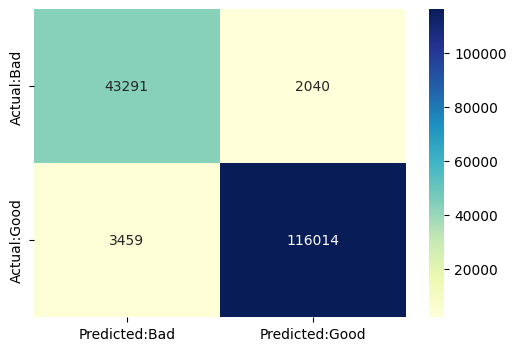

In [25]:
logistic_regression_model = LogisticRegression(class_weight={'bad': 2, 'good': 1}, random_state=42)

logistic_regression_model.fit(X_train_tfidf, y_train)

y_pred_logistic_regression = logistic_regression_model.predict(X_test_tfidf)

accuracy_logistic_regression = accuracy_score(y_test.to_list(), y_pred_logistic_regression)
print(f'Logistic Regression Accuracy: {accuracy_logistic_regression:.2f}')

print(classification_report(y_test.to_list(), y_pred_logistic_regression))

cm_logistic_regression = confusion_matrix(y_test.to_list(), y_pred_logistic_regression)
print('Confusion Matrix (Logistic Regression):')
print(cm_logistic_regression)

print('Training Accuracy :', logistic_regression_model.score(X_train_tfidf, y_train))
print('Testing Accuracy :', accuracy_logistic_regression)

con_mat = pd.DataFrame(confusion_matrix(y_pred_logistic_regression, y_test.to_list()),
        columns=['Predicted:Bad', 'Predicted:Good'],
        index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred_logistic_regression, y_test.to_list(),
                        target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

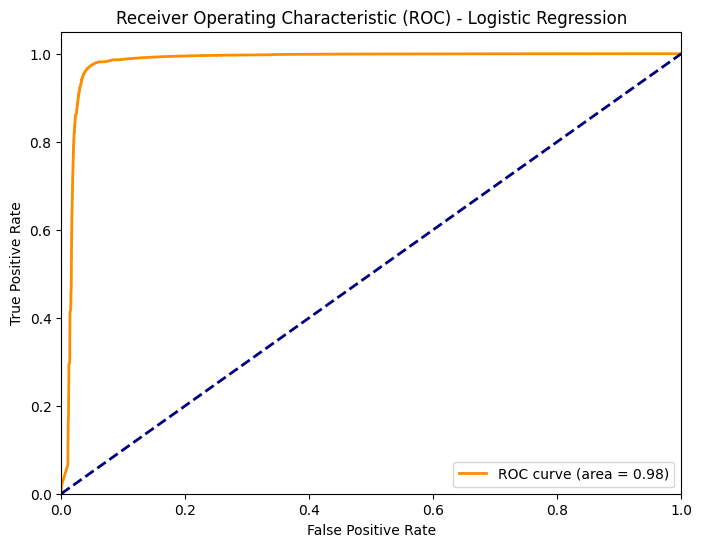

In [26]:
y_test_binary = np.where(y_test == 'bad', 0, 1)

y_prob_logistic_regression = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_logistic_regression)

roc_auc = roc_auc_score(y_test_binary, y_prob_logistic_regression)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(class_weight={'bad': 2, 'good': 1}, random_state=42)

dtree.fit(X_train_tfidf, y_train)

dtree_predict = dtree.predict(X_test_tfidf)

accuracy_dtree = accuracy_score(dtree_predict, y_test)
print(f'Decision Tree Accuracy: {accuracy_dtree:.2f}')

print(classification_report(y_test, dtree_predict))

cm_dtree = confusion_matrix(y_test, dtree_predict)
print('Confusion Matrix (Decision Tree):')
print(cm_dtree)

print('Training Accuracy:', dtree.score(X_train_tfidf, y_train))
print('Testing Accuracy:', accuracy_dtree)

con_mat = pd.DataFrame(confusion_matrix(dtree_predict, y_test),
            columns=['Predicted:Bad', 'Predicted:Good'],
            index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(dtree_predict, y_test,
                            target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

KeyboardInterrupt: ignored

In [ ]:
y_test_binary = np.where(y_test == 'bad', 0, 1)

y_prob_dtree = dtree.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_dtree)

roc_auc = roc_auc_score(y_test_binary, y_prob_dtree)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - DecisionTreeClassifier')
plt.legend(loc='lower right')
plt.show()

NameError: ignored

Random forest

In [ ]:
forest_clf = RandomForestClassifier(max_depth=90, random_state=42, class_weight={'bad': 2, 'good': 1})
forest_clf.fit(X_train_tfidf, y_train)

forest_clf_predict = forest_clf.predict(X_test_tfidf)

accuracy_forest_clf = accuracy_score(forest_clf_predict, y_test)
print(f'Random Forest Accuracy: {accuracy_forest_clf:.2f}')

print(classification_report(y_test, forest_clf_predict))

cm_forest_clf = confusion_matrix(y_test, forest_clf_predict)
print('Confusion Matrix (Random Forest):')
print(cm_forest_clf)

print('Training Accuracy:', forest_clf.score(X_train_tfidf, y_train))
print('Testing Accuracy:', accuracy_forest_clf)

con_mat = pd.DataFrame(confusion_matrix(forest_clf_predict, y_test),
            columns=['Predicted:Bad', 'Predicted:Good'],
            index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(forest_clf_predict, y_test,
                            target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

ValueError: ignored

In [ ]:
y_test_binary = np.where(y_test == 'bad', 0, 1)

y_prob_forest_clf = forest_clf.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_forest_clf)

roc_auc = roc_auc_score(y_test_binary, y_prob_forest_clf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

NotFittedError: ignored

MultinomialNB

MultinomialNB Accuracy: 0.97
              precision    recall  f1-score   support

         bad       0.98      0.91      0.95     46750
        good       0.97      0.99      0.98    118054

    accuracy                           0.97    164804
   macro avg       0.97      0.95      0.96    164804
weighted avg       0.97      0.97      0.97    164804

Confusion Matrix (MultinomialNB):
[[ 42738   4012]
 [   778 117276]]
Training Accuracy: 0.9873823925605005
Testing Accuracy: 0.9709351714764205

CLASSIFICATION REPORT (MultinomialNB)

              precision    recall  f1-score   support

         Bad       0.91      0.98      0.95     43516
        Good       0.99      0.97      0.98    121288

    accuracy                           0.97    164804
   macro avg       0.95      0.97      0.96    164804
weighted avg       0.97      0.97      0.97    164804


CONFUSION MATRIX (MultinomialNB)



<Axes: >

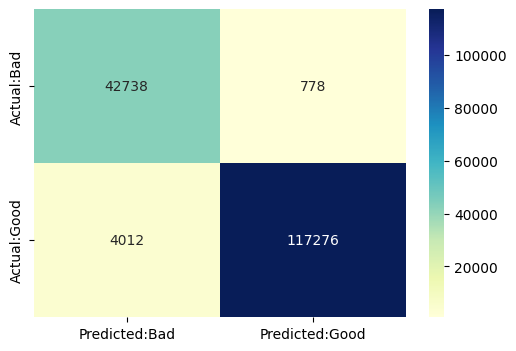

In [27]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_tfidf, y_train)
multinomial_nb_predict = multinomial_nb.predict(X_test_tfidf)

accuracy_multinomial_nb = accuracy_score(multinomial_nb_predict, y_test)
print(f'MultinomialNB Accuracy: {accuracy_multinomial_nb:.2f}')

print(classification_report(y_test, multinomial_nb_predict))

cm_multinomial_nb = confusion_matrix(y_test, multinomial_nb_predict)
print('Confusion Matrix (MultinomialNB):')
print(cm_multinomial_nb)

print('Training Accuracy:', multinomial_nb.score(X_train_tfidf, y_train))
print('Testing Accuracy:', accuracy_multinomial_nb)

con_mat_multinomial_nb = pd.DataFrame(confusion_matrix(multinomial_nb_predict, y_test),
          columns=['Predicted:Bad', 'Predicted:Good'],
          index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT (MultinomialNB)\n')
print(classification_report(multinomial_nb_predict, y_test,
                            target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX (MultinomialNB)\n')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat_multinomial_nb, annot=True, fmt='d', cmap="YlGnBu")

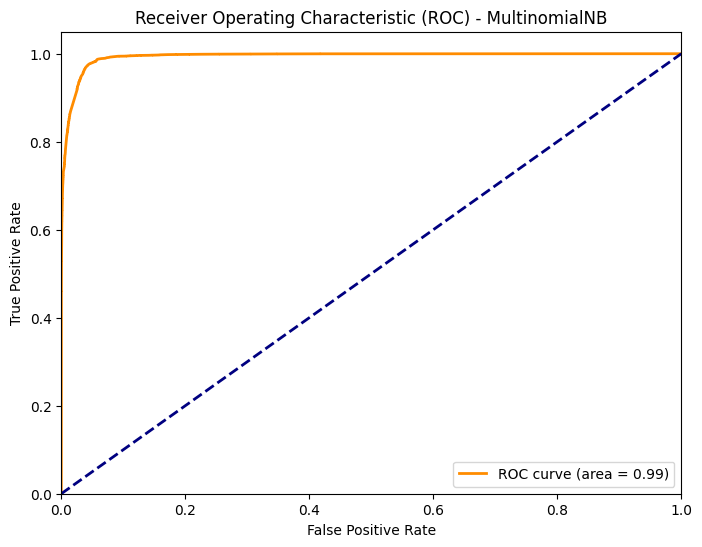

In [28]:
y_test_binary = np.where(y_test == 'bad', 0, 1)

y_prob_multinomial_nb = multinomial_nb.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_multinomial_nb)

roc_auc = roc_auc_score(y_test_binary, y_prob_multinomial_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - MultinomialNB')
plt.legend(loc='lower right')
plt.show()

In [29]:

!pip install xgboost
!pip install lightgbm

In [30]:
YL_train = y_train.replace("good",1)
YL_train = YL_train.replace("bad",0)
set(YL_train)

{0, 1}

In [31]:
X_train

522                                      myocbc-online.com/
325227    experiencefestival.com/a/Montreal_Canadiens_-_...
170813                   en.wikipedia.org/wiki/AMC_Theatres
213179    mickc.whizardries.com/archives/2004/11/05/capt...
33424     'www.zabranou.be/us/paypal/plscript/secure\%20...
                                ...                        
110268    pt-tkbi.com/providernet/provider/provider/webm...
259178                 wiki.d-addicts.com/Ninomiya_Kazunari
365838                                            jlkc.org/
131932                    picobong.com/www.redirect.com.htm
121958                        hacticdocs.org/sz/fox/dropbox
Name: URL, Length: 384542, dtype: object

In [32]:
#LightGBM
import lightgbm as lgb
lightgbm_clf = lgb.LGBMClassifier()
lightgbm_clf.fit(X_train_tfidf, y_train)

[LightGBM] [Info] Number of positive: 274870, number of negative: 109672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 82.208914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191866
[LightGBM] [Info] Number of data points in the train set: 384542, number of used features: 10477
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714798 -> initscore=0.918804
[LightGBM] [Info] Start training from score 0.918804


LGBMClassifier()

LightBGM Classifier Accuracy: 0.90
              precision    recall  f1-score   support

         bad       0.89      0.75      0.81     46750
        good       0.91      0.96      0.93    118054

    accuracy                           0.90    164804
   macro avg       0.90      0.86      0.87    164804
weighted avg       0.90      0.90      0.90    164804

Confusion Matrix (LIghtGBM Classifier):
[[ 35041  11709]
 [  4265 113789]]
Training Accuracy: 0.9122046486469618
Testing Accuracy: 0.9030727409528895

CLASSIFICATION REPORT (lightgbm_clf)

              precision    recall  f1-score   support

         Bad       0.75      0.89      0.81     39306
        Good       0.96      0.91      0.93    125498

    accuracy                           0.90    164804
   macro avg       0.86      0.90      0.87    164804
weighted avg       0.91      0.90      0.91    164804


CONFUSION MATRIX (lightgbm_clf)



<Axes: >

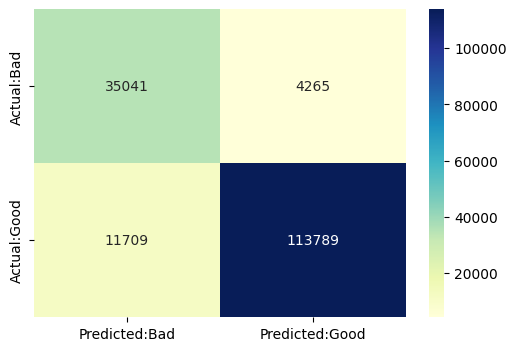

In [33]:
lightgbm_clf_predict = lightgbm_clf.predict(X_test_tfidf)

accuracy_lightgbm_clf = accuracy_score(lightgbm_clf_predict, y_test)
print(f'LightBGM Classifier Accuracy: {accuracy_lightgbm_clf:.2f}')

print(classification_report(y_test, lightgbm_clf_predict))

cm_lightgbm_clf = confusion_matrix(y_test, lightgbm_clf_predict)
print('Confusion Matrix (LIghtGBM Classifier):')
print(cm_lightgbm_clf)

print('Training Accuracy:', lightgbm_clf.score(X_train_tfidf, y_train))
print('Testing Accuracy:', accuracy_lightgbm_clf)

con_mat_lightgbm_clf = pd.DataFrame(confusion_matrix(lightgbm_clf_predict, y_test),
          columns=['Predicted:Bad', 'Predicted:Good'],
          index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT (lightgbm_clf)\n')
print(classification_report(lightgbm_clf_predict, y_test,
                            target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX (lightgbm_clf)\n')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat_lightgbm_clf, annot=True, fmt='d', cmap="YlGnBu")

In [34]:
from xgboost import XGBClassifier
yx_train = y_train.replace({"good":1, "bad":0})
yx_test = y_test.replace({"good":1, "bad":0})

XGBoost Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     46750
           1       0.91      0.97      0.93    118054

    accuracy                           0.90    164804
   macro avg       0.90      0.86      0.87    164804
weighted avg       0.90      0.90      0.90    164804

Confusion Matrix (xgboostC):
[[ 34853  11897]
 [  4095 113959]]
Training Accuracy: 0.9132188421550832
Testing Accuracy: 0.9029635203029053

CLASSIFICATION REPORT (xgboostC)

              precision    recall  f1-score   support

         Bad       0.75      0.89      0.81     38948
        Good       0.97      0.91      0.93    125856

    accuracy                           0.90    164804
   macro avg       0.86      0.90      0.87    164804
weighted avg       0.91      0.90      0.91    164804


CONFUSION MATRIX (xgboostC)



<Axes: >

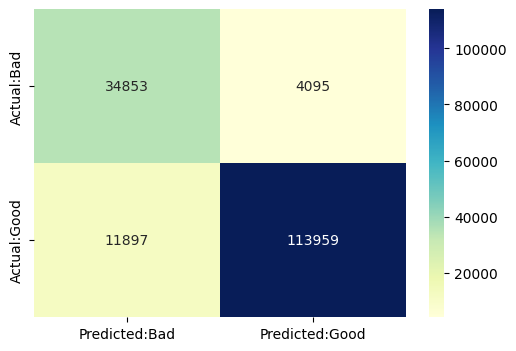

In [35]:
xgboostC = XGBClassifier()
xgboostC.fit(X_train_tfidf, yx_train)
xgboostC_predict = xgboostC.predict(X_test_tfidf)

accuracy_xgboostC = accuracy_score(xgboostC_predict, yx_test)
print(f'XGBoost Accuracy: {accuracy_xgboostC:.2f}')

print(classification_report(yx_test, xgboostC_predict))

cm_xgboostC = confusion_matrix(yx_test, xgboostC_predict)
print('Confusion Matrix (xgboostC):')
print(cm_xgboostC)

print('Training Accuracy:', xgboostC.score(X_train_tfidf, yx_train))
print('Testing Accuracy:', accuracy_xgboostC)

con_mat_xgboostC = pd.DataFrame(confusion_matrix(xgboostC_predict, yx_test),
          columns=['Predicted:Bad', 'Predicted:Good'],
          index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT (xgboostC)\n')
print(classification_report(xgboostC_predict, yx_test,
                            target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX (xgboostC)\n')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat_xgboostC, annot=True, fmt='d', cmap="YlGnBu")

Voting Classifier that combines Logistic Regression, Decision Tree, Random Forest, and MultinomialNB classifiers

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

logistic_regression_model = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(max_depth=10)
#forest_clf = RandomForestClassifier(n_estimators=100)

multinomial_nb = MultinomialNB()
xgboostC = XGBClassifier()
lgbmC = lgb.LGBMClassifier()


voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_regression_model),
    ('xgboostC',xgboostC),
    ('lgbmC', lgbmC),
    ('multinomial_nb', multinomial_nb),
    #('decission_tree',dtree)
], voting='hard')

In [38]:
set(y_train)

{'bad', 'good'}

In [39]:
yy_train = y_train.replace({'bad':0, "good":1})
yy_test = y_test.replace({'bad':0, "good":1})

In [40]:
voting_classifier.fit(X_train_tfidf, yy_train)

[LightGBM] [Info] Number of positive: 274870, number of negative: 109672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 66.029465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176761
[LightGBM] [Info] Number of data points in the train set: 384542, number of used features: 9307
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714798 -> initscore=0.918804
[LightGBM] [Info] Start training from score 0.918804


VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=1000)),
                             ('xgboostC',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importanc...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbmC', LGBMClassifier()),
                             ('multinomial_nb', MultinomialNB())])

In [41]:
ensemble_predictions = voting_classifier.predict(X_test_tfidf)

In [42]:
li_pred = []
for x in ensemble_predictions:
  if(x == 0):
    li_pred.append("bad")
  else:
    li_pred.append("good")

In [ ]:
y_test = y_test.replace("go","good")

In [43]:

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Voting Ensemble Accuracy: {ensemble_accuracy:.2f}')


TypeError: ignored

Voting Ensemble Accuracy: 0.96
CLASSIFICATION REPORT

              precision    recall  f1-score   support

         bad       0.97      0.89      0.93     27175
        good       0.96      0.99      0.97     64008

    accuracy                           0.96     91183
   macro avg       0.96      0.94      0.95     91183
weighted avg       0.96      0.96      0.96     91183

Confusion Matrix (Ensemble Model):
[[24209  2966]
 [  836 63172]]


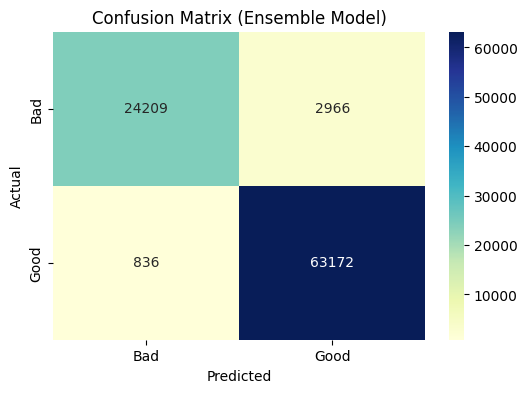

In [ ]:
ensemble_accuracy = accuracy_score(y_test, li_pred)
print(f'Voting Ensemble Accuracy: {ensemble_accuracy:.2f}')

print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, li_pred))

cm_ensemble = confusion_matrix(y_test, li_pred)
print('Confusion Matrix (Ensemble Model):')
print(cm_ensemble)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Ensemble Model)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

ensemble_prob = voting_classifier.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, ensemble_prob)
roc_auc = roc_auc_score(y_test_binary, ensemble_prob)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Voting Ensemble')
plt.legend(loc='lower right')
plt.show()


Model Comparison

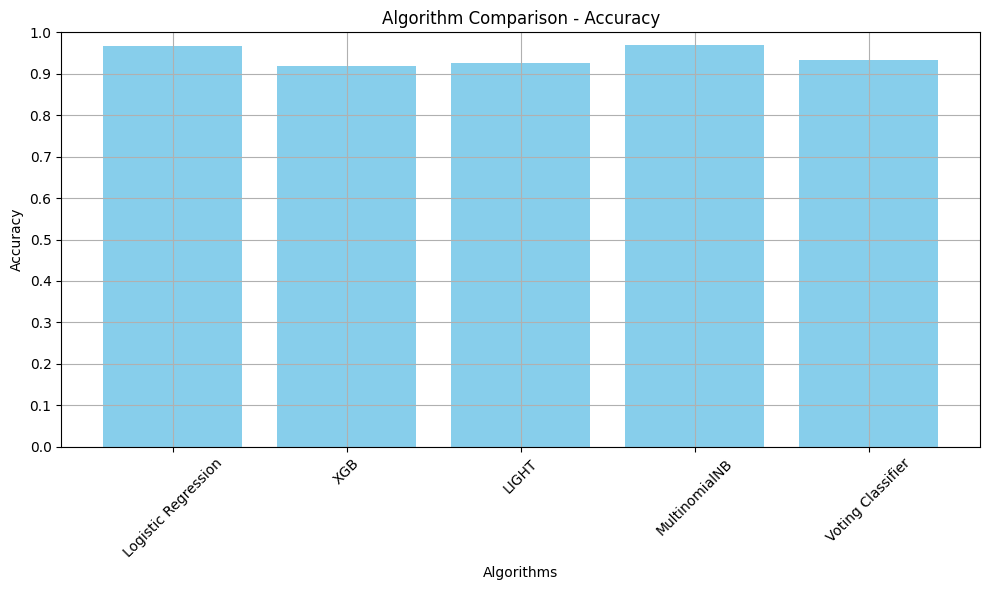

In [ ]:
model_names = ['Logistic Regression', 'XGB', 'LIGHT', 'MultinomialNB', 'Voting Classifier']
accuracy_scores = [accuracy_logistic_regression, accuracy_xgboostC, accuracy_lightgbm_clf, accuracy_multinomial_nb, ensemble_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison - Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.show()

# model_names = ['Logistic Regression', 'XGB', 'LIGHT', 'MultinomialNB', 'Voting Classifier']
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []

# models = [
#     (logistic_regression_model, y_pred_logistic_regression),
#     (dtree, dtree_predict),
#     (forest_clf, forest_clf_predict),
#     (multinomial_nb, multinomial_nb_predict),
#     (voting_classifier, ensemble_predictions)
# ]

# for model, y_pred in models:
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, pos_label='good')
#     recall = recall_score(y_test, y_pred, pos_label='good')
#     f1 = f1_score(y_test, y_pred, pos_label='good')

#     accuracy_scores.append(accuracy)
#     precision_scores.append(precision)
#     recall_scores.append(recall)
#     f1_scores.append(f1)

# metrics_df = pd.DataFrame({
#     'Model': model_names,
#     'Accuracy': accuracy_scores,
#     'Precision': precision_scores,
#     'Recall': recall_scores,
#     'F1 Score': f1_scores
# })

# print(metrics_df)

ROC-AUC curve

In [ ]:
# Calculate ROC curve and AUC for Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)
y_prob_logistic_regression = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_prob_logistic_regression)
auc_lr = roc_auc_score(y_test_binary, y_prob_logistic_regression)

# Calculate ROC curve and AUC for Decision Tree
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train_tfidf, y_train)
y_prob_dtree = dtree.predict_proba(X_test_tfidf)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test_binary, y_prob_dtree)
auc_dtree = roc_auc_score(y_test_binary, y_prob_dtree)

# Calculate ROC curve and AUC for MultinomialNB
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_tfidf, y_train)
y_prob_multinomial_nb = multinomial_nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, y_prob_multinomial_nb)
auc_nb = roc_auc_score(y_test_binary, y_prob_multinomial_nb)

In [ ]:
# Calculate ROC curve and AUC for Random Forest
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train_tfidf, y_train)
y_prob_forest_clf = forest_clf.predict_proba(X_test_tfidf)[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_test_binary, y_prob_forest_clf)
auc_forest = roc_auc_score(y_test_binary, y_prob_forest_clf)

In [ ]:
# Calculate ROC curve and AUC for the Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_regression_model),
    ('decision_tree', dtree),
    ('random_forest', forest_clf),
    ('multinomial_nb', multinomial_nb)
], voting='soft')

voting_classifier.fit(X_train_tfidf, y_train)
y_prob_voting = voting_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr_voting, tpr_voting, _ = roc_curve(y_test_binary, y_prob_voting)
auc_voting = roc_auc_score(y_test_binary, y_prob_voting)

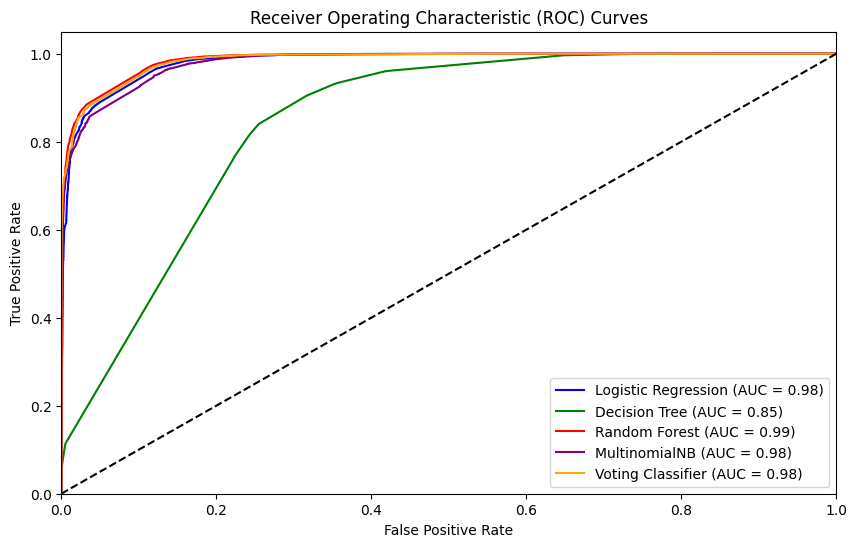

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {auc_dtree:.2f})', color='green')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})', color='red')
plt.plot(fpr_nb, tpr_nb, label=f'MultinomialNB (AUC = {auc_nb:.2f})', color='purple')
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {auc_voting:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

precision-recall curve and AUC

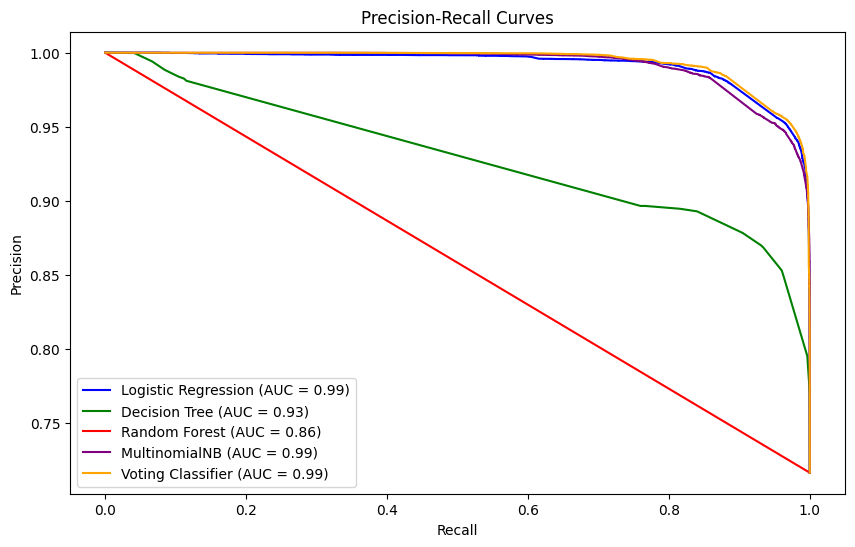

In [ ]:
y_test_binary = (y_test == 'good').astype(int)

# precision-recall curve and AUC for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test_binary, y_prob_logistic_regression)
auc_lr_pr = auc(recall_lr, precision_lr)

# precision-recall curve and AUC for Decision Tree
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test_binary, y_prob_dtree)
auc_dtree_pr = auc(recall_dtree, precision_dtree)

# precision-recall curve and AUC for Random Forest
precision_forest, recall_forest, _ = precision_recall_curve(y_test_binary, y_prob_forest_clf)
auc_forest_pr = auc(recall_forest, precision_forest)

# precision-recall curve and AUC for MultinomialNB
precision_nb, recall_nb, _ = precision_recall_curve(y_test_binary, y_prob_multinomial_nb)
auc_nb_pr = auc(recall_nb, precision_nb)

# precision-recall curve and AUC for Voting Classifier
precision_voting, recall_voting, _ = precision_recall_curve(y_test_binary, y_prob_voting)
auc_voting_pr = auc(recall_voting, precision_voting)

plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_lr_pr:.2f})', color='blue')
plt.plot(recall_dtree, precision_dtree, label=f'Decision Tree (AUC = {auc_dtree_pr:.2f})', color='green')
plt.plot(recall_forest, precision_forest, label=f'Random Forest (AUC = {auc_forest_pr:.2f})', color='red')
plt.plot(recall_nb, precision_nb, label=f'MultinomialNB (AUC = {auc_nb_pr:.2f})', color='purple')
plt.plot(recall_voting, precision_voting, label=f'Voting Classifier (AUC = {auc_voting_pr:.2f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()
